In [1]:
# Impartar librerias
import pandas as pd 
from matplotlib import pyplot as plt 

In [2]:
# leer CSV
df_origin = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df_origin

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [3]:
# Información General
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [4]:
# Resumen Estadísitco
df_origin.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [5]:
# Coeficiente de Variación
df_cv = pd.DataFrame()
for columna in df_origin.describe().columns:
    std = df_origin.describe().loc['std',columna]
    mean = df_origin.describe().loc['mean',columna]
    cv = (std/mean)*100
    df_cv.loc['cv',columna] = cv
df_cv.round(2)

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
cv,57.66,20.56,11.16,16.37,35.2,32.95,5.89,23.73


#### Analizar Datos

In [6]:
# Cantidad de Hombres y Mujeres en el Df
df_origin['Gender'].value_counts().to_frame()

,count
Gender,
Male,189
Female,185


In [7]:
# Categorizar la edad en función de su rango 
df_origin.loc[df_origin['Age'] >= 40, 'Age_group'] = 'Adulto Mayores'
df_origin.loc[df_origin['Age'] <= 40, 'Age_group'] = 'Adulto Jovenes'
df_origin['Age_group'].value_counts()

Age_group
Adulto Mayores    209
Adulto Jovenes    165
Name: count, dtype: int64

In [8]:
df_origin.groupby('Gender')['Age'].agg(['mean','std']).round()

,mean,std
Gender,,
Female,47.0,8.0
Male,37.0,6.0


##### Limpiar Datos

In [9]:
# Normalizar
df_origin['Physical Activity Level'] = df_origin['Physical Activity Level'] / 10


In [10]:
# Encontrar NaN
df_origin[df_origin.isna().any(axis=1) == True] 
# Encontrar no NaN
df_origin[df_origin.isna().any(axis=1) == False] 


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_group
3,4,Male,28,Sales Representative,5.9,4,3.0,8,Obese,140/90,85,3000,Sleep Apnea,Adulto Jovenes
4,5,Male,28,Sales Representative,5.9,4,3.0,8,Obese,140/90,85,3000,Sleep Apnea,Adulto Jovenes
5,6,Male,28,Software Engineer,5.9,4,3.0,8,Obese,140/90,85,3000,Insomnia,Adulto Jovenes
6,7,Male,29,Teacher,6.3,6,4.0,7,Obese,140/90,82,3500,Insomnia,Adulto Jovenes
16,17,Female,29,Nurse,6.5,5,4.0,7,Normal Weight,132/87,80,4000,Sleep Apnea,Adulto Jovenes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,7.5,3,Overweight,140/95,68,7000,Sleep Apnea,Adulto Mayores
370,371,Female,59,Nurse,8.0,9,7.5,3,Overweight,140/95,68,7000,Sleep Apnea,Adulto Mayores
371,372,Female,59,Nurse,8.1,9,7.5,3,Overweight,140/95,68,7000,Sleep Apnea,Adulto Mayores
372,373,Female,59,Nurse,8.1,9,7.5,3,Overweight,140/95,68,7000,Sleep Apnea,Adulto Mayores


##### Responder Preguntas 

#### ¿Quién tiene peor calidad del sueño, hombres o mujeres?

In [11]:
df_origin.groupby('Gender')['Quality of Sleep'].agg(['mean']).round()

,mean
Gender,
Female,8.0
Male,7.0


##### ¿Existe una relación entre calidad del sueño de las personas y su profesión?

In [12]:
type_occupation = {
    'Bussines': ['Sales Representative','Accountant','Salesperson','Manager'],
    'Scient': ['Doctor','Nurse','Scientist'],
    'Ing': ['Software Engineer','Engineer'],
    'Social': ['Teacher','Lawyer']
}
def assign(occupation):
    for clave, occupations in  type_occupation.items():
        if occupation in occupations:
            return clave
        else:
            'uknow'
df_origin['Type_Occupation'] = df_origin['Occupation'].apply(assign)
df_origin.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age_group,Type_Occupation
0,1,Male,27,Software Engineer,6.1,6,4.2,6,Overweight,126/83,77,4200,NaN,Adulto Jovenes,Ing
1,2,Male,28,Doctor,6.2,6,6.0,8,Normal,125/80,75,10000,NaN,Adulto Jovenes,Scient
2,3,Male,28,Doctor,6.2,6,6.0,8,Normal,125/80,75,10000,NaN,Adulto Jovenes,Scient
3,4,Male,28,Sales Representative,5.9,4,3.0,8,Obese,140/90,85,3000,Sleep Apnea,Adulto Jovenes,Bussines
4,5,Male,28,Sales Representative,5.9,4,3.0,8,Obese,140/90,85,3000,Sleep Apnea,Adulto Jovenes,Bussines


In [13]:
R_CSP = df_origin.groupby('Type_Occupation')['Quality of Sleep'].agg(['mean']).round(2).sort_values(by='mean',ascending=True)
R_CSP

,mean
Type_Occupation,
Bussines,6.93
Scient,6.96
Social,7.47
Ing,8.30


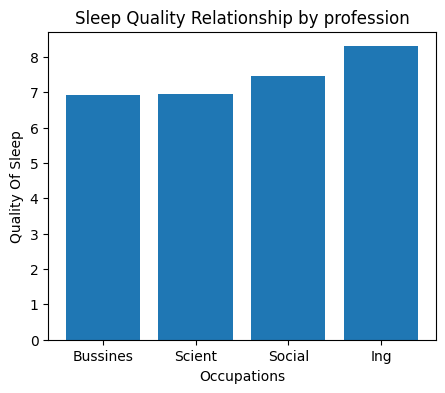

In [14]:
# Grafico
from matplotlib import pyplot as plt 
x , y = R_CSP.index.to_list() , R_CSP['mean'].to_list()
plt.figure(figsize=(5,4))
plt.bar(range(len(x)),y)
plt.xlabel('Occupations')
plt.ylabel('Quality Of Sleep')
plt.xticks(range(len(x)),x)
plt.title('Sleep Quality Relationship by profession')
plt.show()

##### ¿La Actividad Física afecta al sueño?

In [15]:
df_resultado = df_origin.groupby('Quality of Sleep')[['Physical Activity Level', 'Sleep Duration']].mean().round(2).sort_values(by=['Quality of Sleep', 'Sleep Duration'])
df_resultado 


,Physical Activity Level,Sleep Duration
Quality of Sleep,,
4,3.08,5.86
5,3.71,6.50
6,5.46,6.20
7,5.84,7.14
8,6.92,7.40
9,5.56,8.24


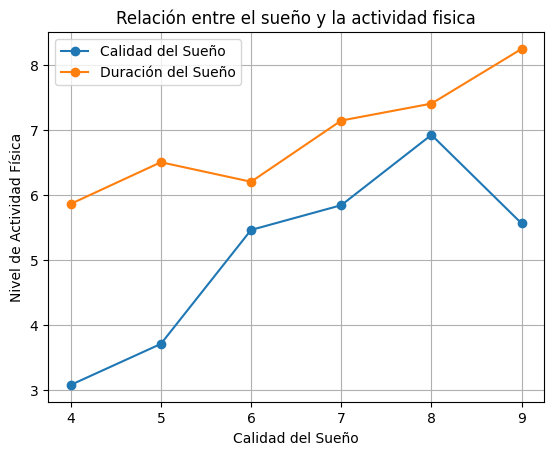

In [16]:
from matplotlib import pyplot as plt

# Datos del gráfico 
quality_of_sleep = df_resultado.index.to_list() 
physical_activity_level = df_resultado['Physical Activity Level']
sleep_duration = df_resultado['Sleep Duration']

# Crear gráfico 
plt.plot(quality_of_sleep,physical_activity_level,label='Calidad del Sueño',marker='o')
plt.plot(quality_of_sleep,sleep_duration,label='Duración del Sueño',marker='o')

# Agregar etiquetas y título
plt.xlabel('Calidad del Sueño')
plt.ylabel('Nivel de Actividad Física')
plt.title('Relación entre el sueño y la actividad fisica')

# Mostrar
plt.legend()
plt.grid()
plt.show()


Coeficienite de correlación:0.66
Error estandar: 0.16
Coeficiente de determinación:43.0%


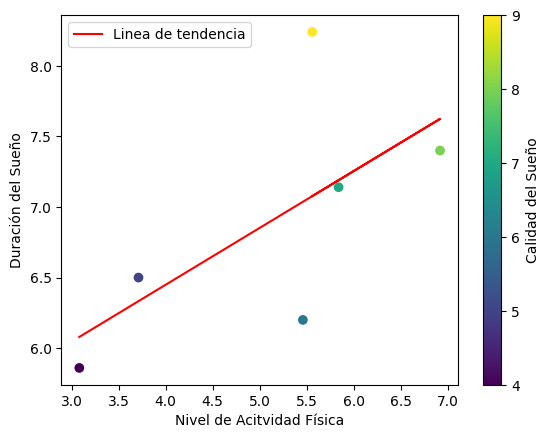

In [17]:
from matplotlib import pyplot as plt 
from scipy import stats
# ajustar línea de tendencia 
slope,intercept,r_value,std_err,p_value = stats.linregress(physical_activity_level,sleep_duration)
# Crea linea de tendencia 
y = intercept + (slope * physical_activity_level)
# Escalares 
print(f'Coeficienite de correlación:{r_value.round(2)}')
print(f'Error estandar: {std_err.round(2)}')
print(f'Coeficiente de determinación:{((r_value**2)*100).round()}%')
# Grafico
plt.scatter(physical_activity_level,sleep_duration,c=quality_of_sleep)
plt.plot(physical_activity_level,y,'r', label='Linea de tendencia')
plt.xlabel('Nivel de Acitvidad Física')
plt.ylabel('Duración del Sueño')
plt.colorbar(label='Calidad del Sueño')
plt.legend()
plt.show()

##### ¿Qué profesión presenta la peor calidad sueño?

In [18]:
P_CS = df_origin.groupby('Occupation')['Quality of Sleep'].agg(['mean']).round(2).sort_values(by='mean')
P_CS

,mean
Occupation,
Sales Representative,4.00
Scientist,5.00
Salesperson,6.00
Software Engineer,6.50
Doctor,6.65
Teacher,6.98
Manager,7.00
Nurse,7.37
Accountant,7.89


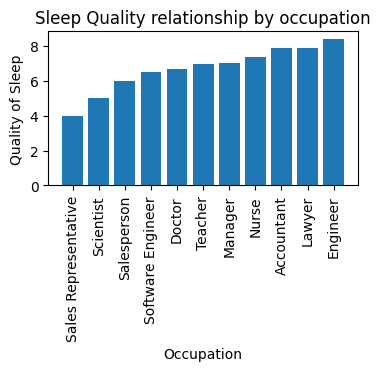

In [19]:
from matplotlib import pyplot as plt 
plt.figure(figsize=(4,2))
# Extraer lso datos 
x , y = P_CS.index.to_list() , P_CS['mean'].to_list()
# Graficar barras 
plt.bar(range(len(x)),y)
plt.xticks(range(len(x)),x,rotation=90)
# Peronalizar
plt.ylabel('Quality of Sleep')
plt.xlabel('Occupation')
plt.title('Sleep Quality relationship by occupation')
plt.show()

##### ¿Qué profesión tiene mayor nivel de estrés y el mayor IMC?

In [20]:
# Categorizar datos BMI
df_origin['BMI Category'] = df_origin['BMI Category'].map({'Normal':1,'Normal Weight':2,'Overweight':3,'Obese':4})
# Agrupar y Operar
P_SBMI = df_origin.groupby('Occupation')[['Stress Level','BMI Category']].mean().round(2).sort_values(by=['Stress Level','BMI Category'],ascending=False)
P_SBMI

,Stress Level,BMI Category
Occupation,,
Sales Representative,8.00,4.00
Salesperson,7.00,3.00
Scientist,7.00,3.00
Doctor,6.73,1.20
Software Engineer,6.00,2.75
Nurse,5.55,2.90
Lawyer,5.06,1.23
Manager,5.00,3.00
Accountant,4.59,1.46


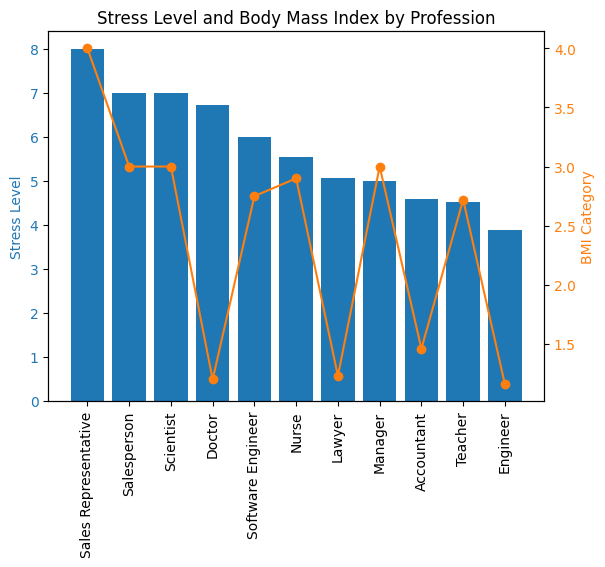

In [26]:
from matplotlib import pyplot as plt 
# Extraer Datos 
x, y1, y2 = P_SBMI.index.to_list(), P_SBMI['Stress Level'].to_list(), P_SBMI['BMI Category'].to_list() 
# Definir par de Ejes
fig, ax1= plt.subplots()
# Crear Grpafico de Barras para nivel de estres 
ax1.bar(x,y1,color='C0')
ax1.set_ylabel('Stress Level',color='C0')
ax1.tick_params(axis='y',labelcolor='C0')
plt.xticks(rotation=90)
# Crar eje secundario para BMI
ax2 = ax1.twinx()
ax2.plot(y2,marker='o',color='C1')
ax2.set_ylabel('BMI Category',color='C1')
ax2.tick_params(axis='y',labelcolor='C1')
# Mostrar Gráfico 
plt.title('Stress Level and Body Mass Index by Profession')
plt.show()

##### ¿En que rango de edadaes se encuentra la mayor cantidad de transtornos del sueño?

In [22]:
import warnings
warnings.filterwarnings('ignore')
df_allSD = pd.DataFrame(df_origin[df_origin.isna().any(axis=1) == False])
rango = [0, 18, 30, 40, 50, 60 ,70, 100]
etiquetas = ['>18','18-30','30-40','40-50','50-60','60-70','70+']
df_allSD['Age Range'] = pd.cut(df_allSD['Age'],bins=rango,labels=etiquetas)
R_TS = df_allSD.groupby('Age Range')['Sleep Disorder'].size().to_frame()
R_TS

,Sleep Disorder
Age Range,
>18,0
18-30,9
30-40,13
40-50,93
50-60,40
60-70,0
70+,0


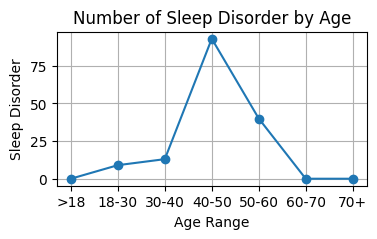

In [23]:
from matplotlib import pyplot as plt 
x , y = R_TS.index.to_list() , R_TS['Sleep Disorder'].to_list()
plt.figure(figsize=(4,2)) # opcional 
plt.plot(x,y,marker='o')
plt.ylabel('Sleep Disorder')
plt.xlabel('Age Range')
plt.title('Number of Sleep Disorder by Age')
plt.grid()
plt.show()


##### La cantidad de pasos al día, ¿Afecta la calidad del sueño y al índice de Masa Corporal? 

In [24]:
R_PI = df_origin.groupby('Quality of Sleep')[['Daily Steps','BMI Category']].mean().round(2).sort_values(by=['Daily Steps','BMI Category'])
R_PI

,Daily Steps,BMI Category
Quality of Sleep,,
4,3880.00,3.60
5,4257.14,2.43
9,6047.89,2.07
7,6659.74,2.19
6,7092.38,2.37
8,7462.39,1.11


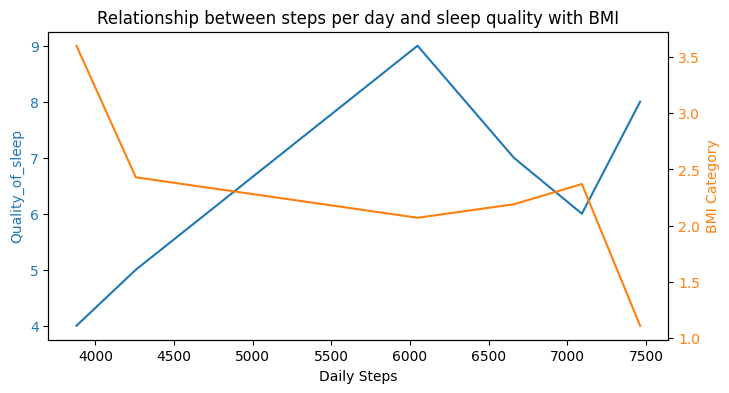

In [25]:
from matplotlib import pyplot as plt 
x,y,z = R_PI['Daily Steps'].to_list(), R_PI.index.to_list(), R_PI['BMI Category']
fig, ax1 = plt.subplots(figsize=(8,4)) 
ax1.plot(x,y,label='quality_of_sleep',color='C0')
ax1.tick_params(axis='y',labelcolor='C0')
ax2 = ax1.twinx()
ax2.plot(x,z,label='bmi_category',color='C1')
ax2.tick_params(axis='y',labelcolor='C1')
ax1.set_ylabel('Quality_of_sleep',color='C0')
ax1.set_xlabel('Daily Steps')
ax2.set_ylabel('BMI Category',color='C1')
plt.title('Relationship between steps per day and sleep quality with BMI')
plt.show()